# Student Performance Analysis

This project explores factors affecting students' academic performance using Python.
## Data Loading
## Data Cleaning
## Exploratory Data Analysis
## Visualization
## Insights



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("student-mat.csv", sep=';')

# Preview the data
df.head()

# Dataset structure
df.info()

# Summary statistics
df.describe()


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [55]:
df.shape
df.columns
df.columns = df.columns.str.strip()
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [8]:
#Check for Impossible Values. Grades in this dataset should be between 0 and 20.
df[['G1', 'G2', 'G3']].describe()

,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,10.908861,10.713924,10.415190
std,3.319195,3.761505,4.581443
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,14.000000
max,19.000000,19.000000,20.000000


In [14]:
#Does it contain negative values? (should not). Are there extreme outliers? (e.g. 100+ absences)
df['absences'].describe()


count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [59]:
df['failures'].value_counts()

failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64

In [56]:
#M and F (not Male, male, m) U and R (not mixed spellings)
df['sex'].value_counts()
df['address'].value_counts()

address
U    307
R     88
Name: count, dtype: int64

## Exploratory Data Analysis

In [57]:
df.groupby('studytime')['G3'].mean()

studytime
1    10.047619
2    10.171717
3    11.400000
4    11.259259
Name: G3, dtype: float64

In [19]:
#Do students who study more also miss fewer classes?
#Attendance may partially explain why students with higher study time perform better.
df.groupby('studytime')['absences'].mean()

studytime
1    5.761905
2    6.277778
3    4.538462
4    4.148148
Name: absences, dtype: float64

In [60]:
df.groupby(pd.cut(df['absences'], bins=[-1, 5, 15, 100]), observed=False)['G3'].mean()


absences
(-1, 5]      10.168675
(5, 15]      11.070796
(15, 100]    10.030303
Name: G3, dtype: float64

In [63]:
# Define bins and labels
bins = [-1, 5, 15, 100]
labels = ["Low absences (0–5)", "Medium absences (6–15)", "High absences (16–100)"]

# Apply pd.cut with labels
df.groupby(pd.cut(df['absences'], bins=bins, labels=labels), observed=False)['G3'].mean()

absences
Low absences (0–5)        10.168675
Medium absences (6–15)    11.070796
High absences (16–100)    10.030303
Name: G3, dtype: float64

In [27]:
#Past academic failures strongly predict lower final performance.
df.groupby('failures')['G3'].mean()

failures
0    11.253205
1     8.120000
2     6.235294
3     5.687500
Name: G3, dtype: float64

In [64]:
#Students receiving school support may already be struggling academically.
df.groupby('schoolsup')['G3'].mean()

schoolsup
no     10.561047
yes     9.431373
Name: G3, dtype: float64

In [29]:
#family support doesn’t show a clear positive impact on grades in this dataset — the averages are very close, and slightly higher for “no support.”
df.groupby('famsup')['G3'].mean()


famsup
no     10.640523
yes    10.272727
Name: G3, dtype: float64

In [68]:
#Best predictors of final grade (G3): G2 and G1.
#Moderate negative factor: Failures.
#Weak predictors: Study time and absences.
df[['studytime', 'absences', 'failures', 'G1', 'G2', 'G3']].corr()['G3']

studytime    0.097820
absences     0.034247
failures    -0.360415
G1           0.801468
G2           0.904868
G3           1.000000
Name: G3, dtype: float64

## Visualization

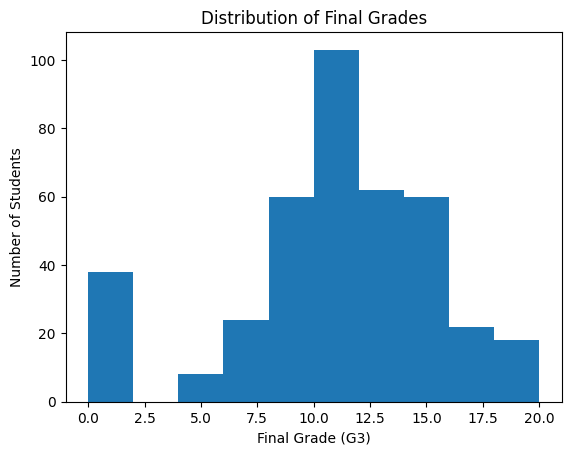

In [65]:
plt.hist(df['G3'], bins=10)
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.title('Distribution of Final Grades')
plt.savefig('Distribution of Final Grades.png')
plt.show()

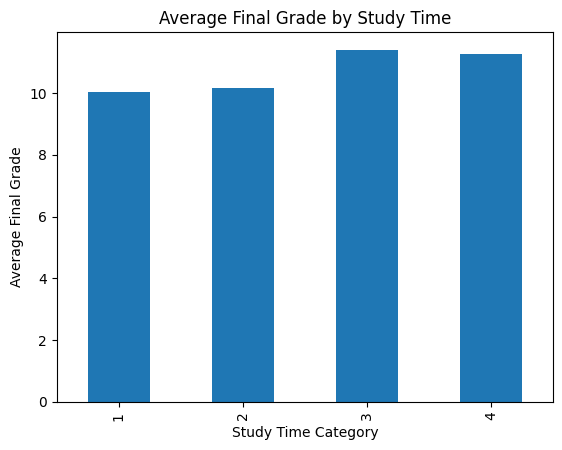

In [52]:
df.groupby('studytime')['G3'].mean().plot(kind='bar')
plt.xlabel('Study Time Category')
plt.ylabel('Average Final Grade')
plt.title("Average Final Grade by Study Time")
plt.savefig("Average_Final_Grade_by_Study_Time.png")
plt.show()


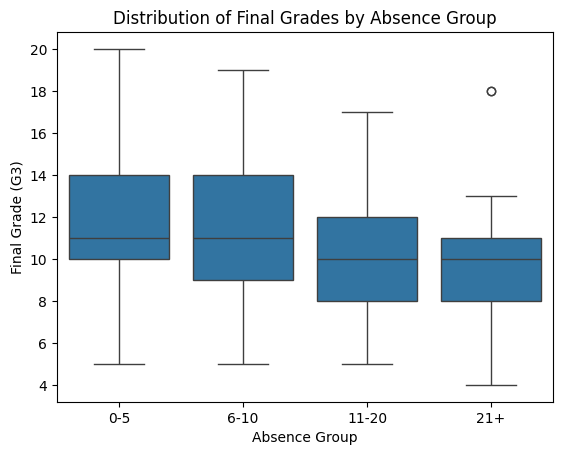

In [66]:
df['absence_group'] = pd.cut(df['absences'], bins=[0,5,10,20,70],
                             labels=["0-5","6-10","11-20","21+"])

sns.boxplot(x="absence_group", y="G3", data=df)
plt.xlabel("Absence Group")
plt.ylabel("Final Grade (G3)")
plt.title("Distribution of Final Grades by Absence Group")
plt.savefig("absences_vs_grade.png")
plt.show()


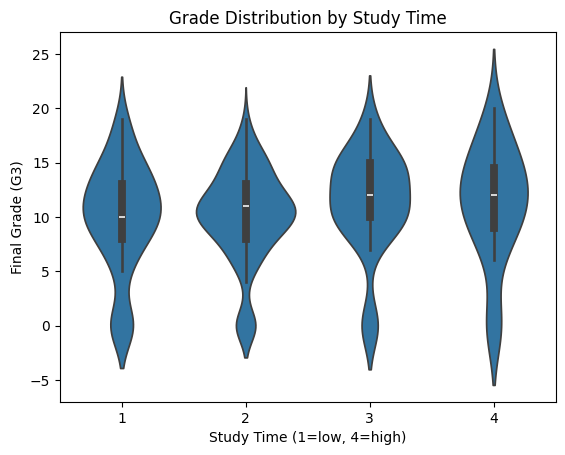

In [53]:
sns.violinplot(x="studytime", y="G3", data=df)
plt.xlabel("Study Time (1=low, 4=high)")
plt.ylabel("Final Grade (G3)")
plt.title("Grade Distribution by Study Time")
plt.savefig("Grade_Distribution_by_Study_Time.png")
plt.show()

## Key Insights

- Students who studied more generally had higher grades.
- High absences were associated with lower final grades.
- Attendance matters: More absences are linked to lower grades.
- Grades are multifactorial: While study time and absences are important, other factors (family support, prior grades, failures) also influence outcomes.
- Actionable insight: Encouraging regular study routines and reducing absences could improve student performance overall.
